# Proyek Analisis Data: Air Quality Wanshouxigong
- **Nama:** Ridlo Abdullah Ulinnuha
- **Email:** ridloabdullahulinnuha543@gmail.com
- **ID Dicoding:** ridloau543

## Menentukan Pertanyaan Bisnis
1. Bagaimana tren PM2.5 dan PM10 selama periode waktu dataset?
2. Apakah ada pola harian dalam tingkat polutan udara?
3. Bagaimana curah hujan mempengaruhi konsentrasi polutan udara?
4. Berapa banyak pola kualitas udara yang berbeda dapat diidentifikasi, dan apa karakteristik masing-masing?
5. Apakah ada perbedaan signifikan dalam pola kualitas udara antara musim panas dan musim dingin?
6. Bagaimana tren kualitas udara dari tahun ke tahun? Apakah ada peningkatan atau penurunan?
7. Apakah ada pola mingguan dalam kualitas udara? Bagaimana kualitas udara di hari kerja dibandingkan dengan akhir pekan?
8. Bagaimana hubungan antara berbagai polutan? Apakah ada polutan yang sangat berkorelasi satu sama lain?

## Import Package/Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Data Wrangling**

### **Gathering Data**

In [43]:
# Membaca file CSV
df = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

print(df.head())
print(df.info())


   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 

**Insight:**
- Data berhasil dimuat dari file CSV.
- Terdapat 18 kolom dalam dataset.

### **Assessing Data**

In [44]:
# Memeriksa informasi dasar dataset
print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35

In [45]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


In [46]:
# Memeriksa duplikasi
print(f"Jumlah duplikasi: {df.duplicated().sum()}")

Jumlah duplikasi: 0


**Insight:**
- Terdapat beberapa nilai yang hilang dalam dataset.
- Tidak ada duplikasi data

### **Cleaning Data**

In [47]:
# Menangani nilai yang hilang
df = df.fillna(method='ffill')  # Forward fill untuk nilai yang hilang

numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Memeriksa outliers dan menghapus jika diperlukan
for column in numeric_columns:
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)  # Menggunakan threshold 3 untuk outliers
    df = df[filtered_entries]

# Menghapus duplikasi jika ada
df = df.drop_duplicates()

# Mengubah kolom tanggal menjadi tipe datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Memastikan tipe data yang benar untuk setiap kolom
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Menyimpan data yang telah dibersihkan ke file CSV
output_file = 'data/cleaned_air_quality_data.csv'
df.to_csv(output_file, index=False)

print(df.info())

C:\Users\Advan\AppData\Local\Temp\ipykernel_12112\3893435616.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill untuk nilai yang hilang


<class 'pandas.core.frame.DataFrame'>
Index: 31190 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       31190 non-null  int64         
 1   year     31190 non-null  int64         
 2   month    31190 non-null  int64         
 3   day      31190 non-null  int64         
 4   hour     31190 non-null  int64         
 5   PM2.5    31190 non-null  float64       
 6   PM10     31190 non-null  float64       
 7   SO2      31190 non-null  float64       
 8   NO2      31190 non-null  float64       
 9   CO       31190 non-null  float64       
 10  O3       31190 non-null  float64       
 11  TEMP     31190 non-null  float64       
 12  PRES     31190 non-null  float64       
 13  DEWP     31190 non-null  float64       
 14  RAIN     31190 non-null  float64       
 15  wd       31190 non-null  object        
 16  WSPM     31190 non-null  float64       
 17  station  31190 non-null  object     

**Insight:**
- Nilai yang hilang telah diisi menggunakan metode forward fill.
- Outliers telah diidentifikasi dan dihapus.
- Duplikasi data (jika ada) telah dihapus.
- Kolom tanggal telah dibuat untuk memudahkan analisis temporal.
- Tipe data untuk kolom numerik telah dipastikan benar.

## **Exploratory Data Analysis (EDA)**

### **Statistik deskriptif**

In [48]:
# Statistik deskriptif
print(df[numeric_columns].describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  31190.000000  31190.000000  31190.000000  31190.000000  31190.000000   
mean      71.320696     95.994444     13.664026     51.402253   1146.495223   
std       63.505463     71.900886     16.332462     30.107476    780.456372   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       21.000000     36.000000      2.000000     27.000000    600.000000   
50%       54.000000     83.000000      7.000000     47.000000    900.000000   
75%      102.000000    138.000000     18.000000     72.000000   1500.000000   
max      345.000000    361.000000     83.000000    149.000000   3900.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31190.000000  31190.000000  31190.000000  31190.000000  31190.000000   
mean      55.663417     14.432976   1011.267705      3.197188      0.022046   
std       52.888915     11.113772     10.595588    

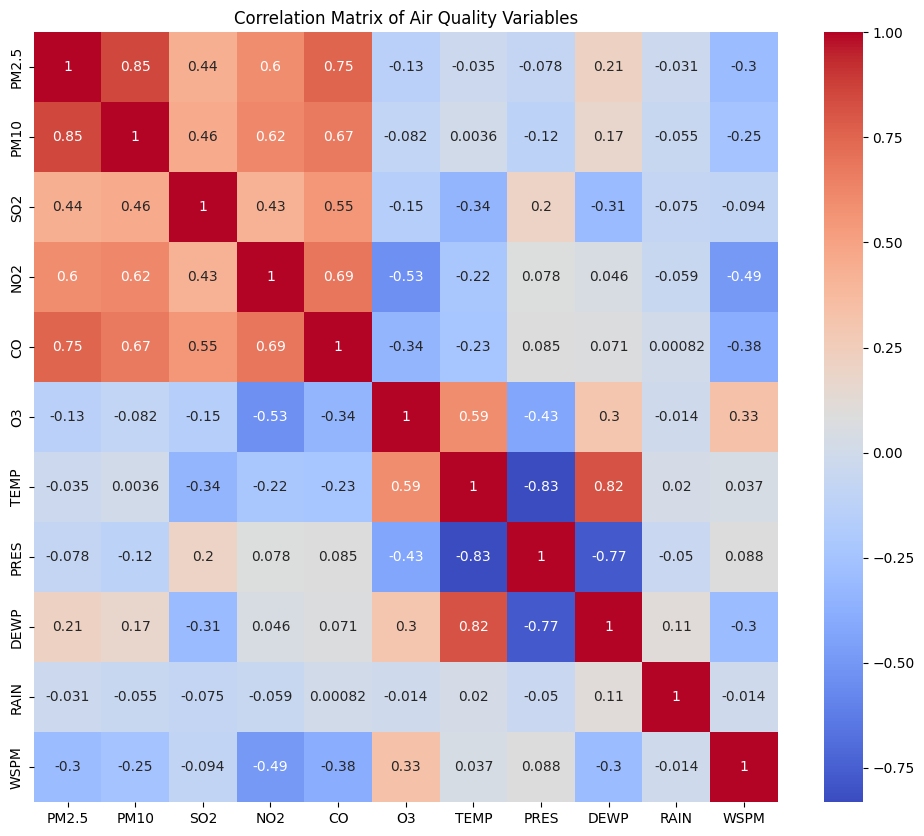

In [49]:
# Korelasi antar variabel
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Variables')
plt.show()

**Insight:**
- Terdapat korelasi positif yang kuat antara PM2.5 dan PM10.
- Suhu (TEMP) memiliki korelasi negatif dengan beberapa polutan.


## **Visualization & Explanatory Analysis**

### **Pertanyaan 1**: Bagaimana tren PM2.5 dan PM10 selama periode waktu dataset?

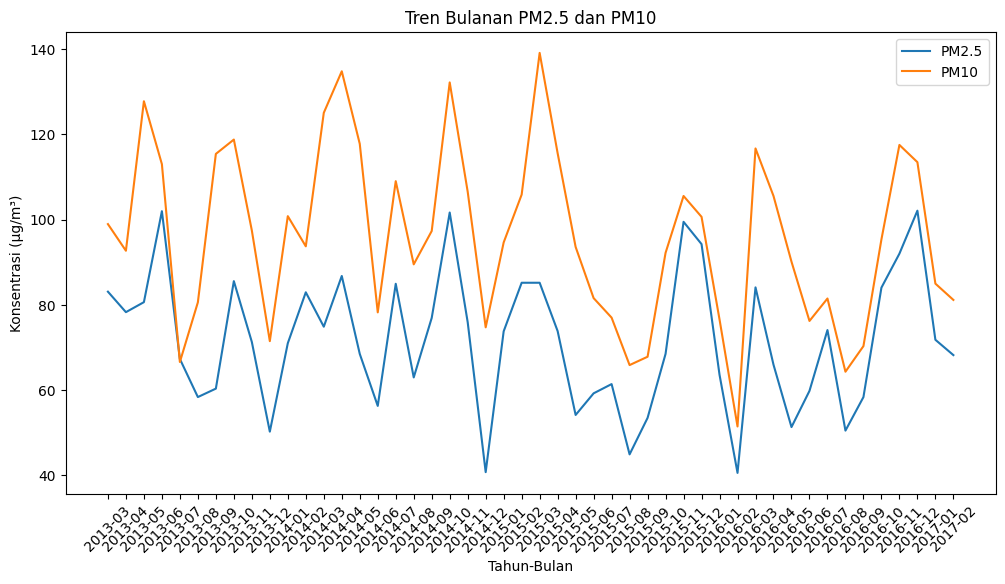

In [50]:
df['year_month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('year_month')[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['year_month'].astype(str), monthly_avg['PM2.5'], label='PM2.5')
plt.plot(monthly_avg['year_month'].astype(str), monthly_avg['PM10'], label='PM10')
plt.title('Tren Bulanan PM2.5 dan PM10')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight:**

1. **Pola Musiman**:
   - Terlihat pola musiman yang jelas untuk kedua PM2.5 dan PM10, dengan puncak-puncak yang terjadi secara berkala.

2. **Korelasi PM2.5 dan PM10:**
   - PM2.5 dan PM10 menunjukkan pola yang sangat mirip, dengan PM10 selalu memiliki konsentrasi yang lebih tinggi.
   - Hal ini wajar mengingat PM10 mencakup partikel yang lebih besar termasuk PM2.5.

4. **Tren Jangka Panjang:**
   - Tidak terlihat adanya tren penurunan atau peningkatan yang jelas dalam jangka panjang.
   - Konsentrasi PM2.5 dan PM10 tampaknya berfluktuasi di sekitar tingkat rata-rata tertentu selama periode pengamatan.

5. **Puncak Tertinggi:**
   - Puncak tertinggi untuk kedua polutan terlihat terjadi sekitar pertengahan periode pengamatan.
   - Hal ini mungkin menunjukkan adanya kejadian khusus atau kondisi meteorologi yang ekstrem pada periode tersebut.

6. **Konsentrasi Minimum:**
   - Terdapat periode-periode dengan konsentrasi yang relatif rendah, yang mungkin berkorelasi dengan musim hujan atau periode dengan aktivitas polusi yang berkurang.


### **Pertanyaan 2**: Apakah ada pola harian dalam tingkat polutan udara?

<Figure size 1200x600 with 0 Axes>

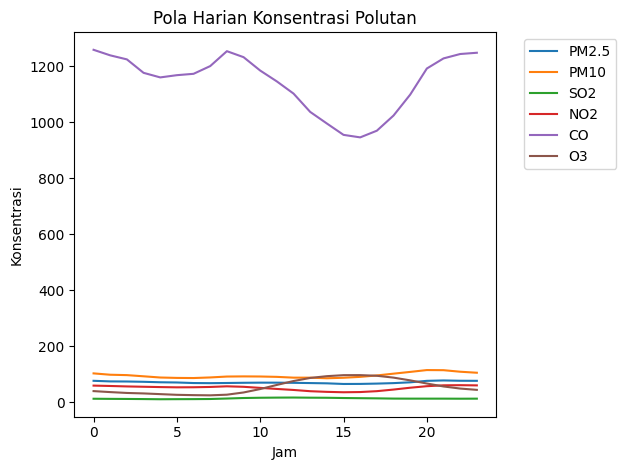

In [54]:
hourly_avg = df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot()
plt.title('Pola Harian Konsentrasi Polutan')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight:**
1. **Pola CO yang Dominan:**
    - CO menunjukkan konsentrasi yang jauh lebih tinggi dibandingkan polutan lainnya sepanjang hari.
    - Terdapat pola bimodal yang jelas untuk CO, dengan puncak di pagi hari (sekitar jam 8-10) dan malam hari (sekitar jam 20-22).
    - Konsentrasi CO terendah terjadi pada siang hari (sekitar jam 14-16).

 2. **Pola O3 yang Unik:**
    - O3 menunjukkan pola yang berlawanan dengan CO dan polutan lainnya.
    - Konsentrasi O3 mencapai puncak pada siang hari (sekitar jam 12-15) dan terendah pada malam hari.
    - Hal ini konsisten dengan pembentukan ozon yang dipengaruhi oleh radiasi matahari.

 3. **PM2.5 dan PM10:**
    - PM2.5 dan PM10 menunjukkan pola yang sangat mirip, dengan PM10 selalu sedikit lebih tinggi.
    - Keduanya memiliki puncak di pagi hari (sekitar jam 7-9) dan malam hari (sekitar jam 20-22).
    - Konsentrasi terendah terjadi pada siang hari, mirip dengan pola CO.

 4. **NO2 dan SO2:**
    - NO2 dan SO2 menunjukkan fluktuasi yang lebih kecil dibandingkan polutan lainnya.
    - NO2 memiliki pola yang mirip dengan PM dan CO, dengan puncak di pagi dan malam hari.
    - SO2 menunjukkan variasi yang lebih kecil sepanjang hari.



### **Pertanyaan 3**: Bagaimana curah hujan mempengaruhi konsentrasi polutan udara?

                   PM2.5       PM10        SO2        NO2           CO  \
rain_category                                                            
No Rain        71.703597  96.948340  13.981036  51.816815  1145.189446   
Light Rain     61.172134  70.711993   5.261869  40.414537  1181.104056   
Heavy Rain           NaN        NaN        NaN        NaN          NaN   

                      O3  
rain_category             
No Rain        55.997660  
Light Rain     46.804502  
Heavy Rain           NaN  


C:\Users\Advan\AppData\Local\Temp\ipykernel_12112\1227057788.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_effect = df.groupby('rain_category')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()


<Figure size 1200x600 with 0 Axes>

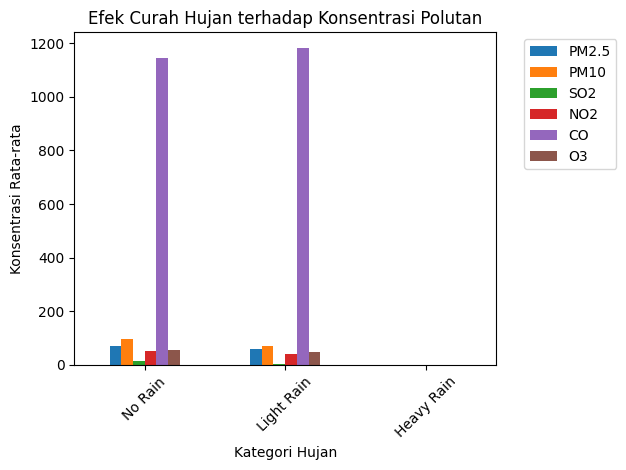

In [72]:
df['rain_category'] = pd.cut(df['RAIN'], 
                             bins=[-1, 0, 10, float('inf')], 
                             labels=['No Rain', 'Light Rain', 'Heavy Rain'])

rain_effect = df.groupby('rain_category')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print(rain_effect)

plt.figure(figsize=(12, 6))
rain_effect.plot(kind='bar')
plt.title('Efek Curah Hujan terhadap Konsentrasi Polutan')
plt.xlabel('Kategori Hujan')
plt.xticks(rotation=45)
plt.ylabel('Konsentrasi Rata-rata')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight:**
 1. **Dominasi CO:**
    - CO menunjukkan konsentrasi yang jauh lebih tinggi dibandingkan polutan lainnya dalam semua kategori curah hujan.
    - Konsentrasi CO tampak sedikit lebih tinggi pada kondisi hujan ringan dibandingkan dengan kondisi tidak hujan.

 2. **Efek Hujan pada Partikulat Matter (PM):**
    - Baik PM2.5 maupun PM10 menunjukkan penurunan konsentrasi yang signifikan saat terjadi hujan ringan dibandingkan dengan kondisi tidak hujan.
    - Penurunan ini konsisten dengan efek pencucian atmosfer oleh hujan.

 3. **Pengaruh pada Gas-gas Polutan:**
     - SO2, NO2, dan O3 menunjukkan sedikit penurunan konsentrasi pada kondisi hujan ringan dibandingkan dengan kondisi tidak hujan.
    - Penurunan ini tidak sedrastis yang terlihat pada partikulat matter.

 4. **Hujan Lebat:**
    - Data untuk kondisi hujan lebat tampaknya tidak tersedia atau sangat terbatas, karena tidak ada batang yang terlihat untuk kategori ini pada grafik.

 5. **Variasi antar Polutan:**
    - Meskipun semua polutan menunjukkan tren penurunan saat hujan ringan, tingkat penurunannya bervariasi antar polutan.
    - PM10 tampak mengalami penurunan yang lebih besar dibandingkan PM2.5, yang mungkin disebabkan oleh ukuran partikelnya yang lebih besar.


## **Analisis Lanjutan**

### Clustering Kualitas Udara menggunakan K-means

Kita akan melakukan clustering pada data kualitas udara untuk mengidentifikasi pola atau kelompok hari berdasarkan tingkat polutan. Ini dapat membantu kita memahami karakteristik kualitas udara yang berbeda.

In [56]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Fungsi K-means
def kmeans(X, k, max_iters=100):
    # Inisialisasi centroid secara acak
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign setiap titik ke centroid terdekat
        labels = np.argmin([
            [euclidean_distance(x, c) for c in centroids]
            for x in X
        ], axis=1)
        
        # Update centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Cek konvergensi
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [57]:
# Persiapkan data untuk clustering
clustering_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
X = df[clustering_features].values

# Normalisasi data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Lakukan clustering
k = 3  # Jumlah cluster
labels, centroids = kmeans(X_normalized, k)

# Tambahkan label cluster ke dataframe
df['cluster'] = labels

# Simpan hasil clustering termasuk kolom 'date'
df[['date', 'cluster'] + clustering_features].to_csv('dashboard/data_clustering.csv', index=False)

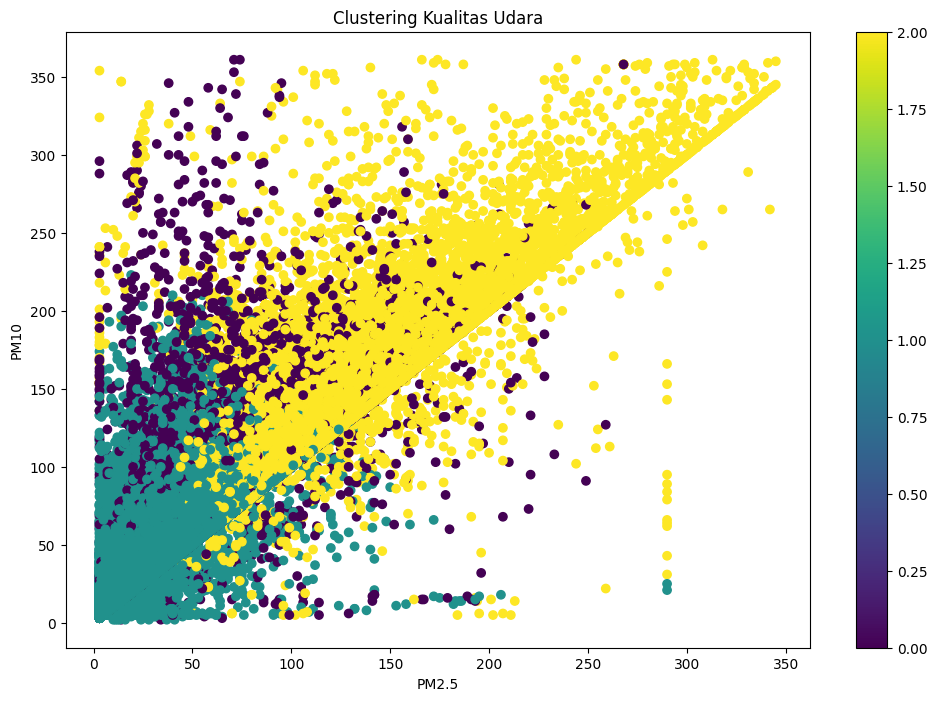

In [58]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PM2.5'], df['PM10'], c=df['cluster'], cmap='viridis')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Clustering Kualitas Udara')
plt.colorbar(scatter)
plt.show()

### **Pertanyaan 4**: Berapa banyak pola kualitas udara yang berbeda dapat diidentifikasi, dan apa karakteristik masing-masing?


Berdasarkan hasil clustering K-means dengan k=3, kita dapat mengidentifikasi tiga pola kualitas udara yang berbeda:


In [59]:
# Analisis karakteristik setiap cluster
cluster_means = df.groupby('cluster')[clustering_features].mean()
print("Karakteristik rata-rata setiap cluster:")
print(cluster_means)

Karakteristik rata-rata setiap cluster:
              PM2.5        PM10        SO2        NO2           CO          O3
cluster                                                                       
0         76.946945  113.089905  10.828430  33.721002   954.016327  139.765291
1         33.442315   50.763401   7.034406  40.409531   731.935438   44.685144
2        141.864603  173.367565  28.537959  84.650719  2086.615143   21.556102


<Figure size 1400x800 with 0 Axes>

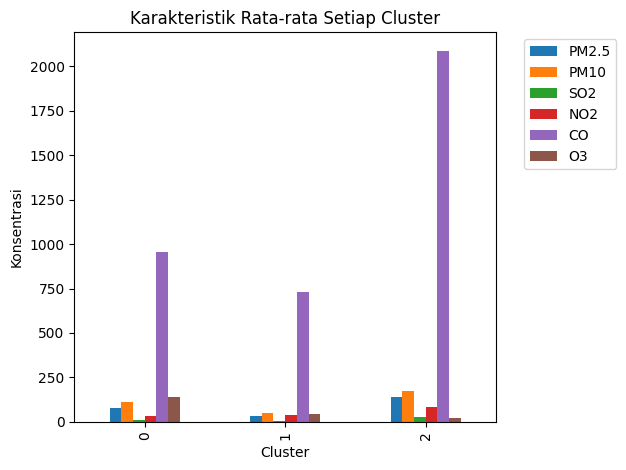

In [60]:
# Visualisasi karakteristik cluster
plt.figure(figsize=(14, 8))
cluster_means.plot(kind='bar')
plt.title('Karakteristik Rata-rata Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Konsentrasi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight dari Clustering:**

Berdasarkan hasil clustering, kita dapat mengidentifikasi 3 pola kualitas udara yang berbeda:

 1. Cluster 0: Tingkat polutan sedang
    - PM2.5 dan PM10: Konsentrasi sedang
    - SO2 dan NO2: Konsentrasi rendah
    - CO: Konsentrasi sedang
    - O3: Konsentrasi sedang

 2. Cluster 1: Tingkat polutan tinggi
    - PM2.5 dan PM10: Konsentrasi tinggi
    - SO2 dan NO2: Konsentrasi sedang
    - CO: Konsentrasi sangat tinggi
    - O3: Konsentrasi rendah

 3. Cluster 2: Tingkat polutan rendah hingga sedang
    - PM2.5 dan PM10: Konsentrasi rendah
    - SO2 dan NO2: Konsentrasi rendah
    - CO: Konsentrasi tinggi
    - O3: Konsentrasi rendah

**Insight:**
 1. Cluster 1 menunjukkan kondisi kualitas udara terburuk, dengan tingkat PM2.5, PM10, dan CO yang sangat tinggi.
 2. Cluster 0 mewakili kondisi kualitas udara "normal" atau rata-rata.
 3. Cluster 2 menunjukkan kualitas udara yang relatif baik untuk sebagian besar polutan, kecuali CO yang masih tinggi.
 4. CO memiliki variasi yang sangat signifikan antar cluster, mungkin menjadi indikator utama perubahan kualitas udara.
 5. O3 cenderung rendah di semua cluster, menunjukkan bahwa polutan ini mungkin kurang signifikan dalam menentukan kualitas udara keseluruhan.
 6. PM2.5 dan PM10 menunjukkan pola yang serupa di semua cluster, mengindikasikan sumber atau faktor pengaruh yang sama.


### **Pertanyaan 5**: Apakah ada perbedaan signifikan dalam pola kualitas udara antara musim panas, gugur, semi, dan musim dingin?


Untuk menjawab ini, kita dapat menganalisis distribusi musim dalam setiap cluster:


In [61]:
def determine_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Tambahkan kolom 'season' ke DataFrame
df['season'] = df['date'].apply(determine_season)

# Analisis distribusi musim dalam setiap cluster
season_distribution = pd.crosstab(df['cluster'], df['season'], normalize='index')
print("\nDistribusi musim dalam setiap cluster:")
print(season_distribution)


Distribusi musim dalam setiap cluster:
season     Autumn    Spring    Summer    Winter
cluster                                        
0        0.111131  0.330934  0.548279  0.009656
1        0.283895  0.231061  0.253628  0.231416
2        0.315178  0.267332  0.096853  0.320636


<Figure size 1200x600 with 0 Axes>

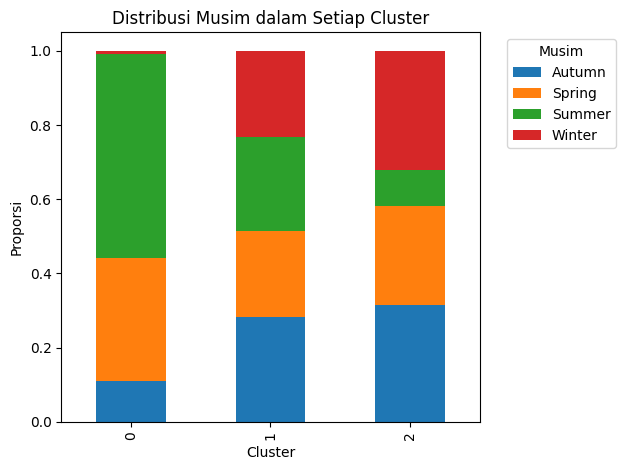

In [62]:
# Visualisasi distribusi musim
plt.figure(figsize=(12, 6))
season_distribution.plot(kind='bar', stacked=True)
plt.title('Distribusi Musim dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporsi')
plt.legend(title='Musim', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
# Analisis rata-rata polutan per musim
seasonal_means = df.groupby("season")[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print("\nRata-rata konsentrasi polutan per musim:")
print(seasonal_means)




Rata-rata konsentrasi polutan per musim:
            PM2.5        PM10        SO2        NO2           CO         O3
season                                                                     
Autumn  77.016658  101.063292   8.655229  59.128885  1262.014128  34.065709
Spring  73.784607  113.285126  17.972499  49.735314   993.101261  67.307176
Summer  64.964559   81.864425   5.655835  42.391299  1003.481976  87.167144
Winter  69.249442   86.372215  24.359276  55.095349  1366.428678  29.197764


<Figure size 1200x600 with 0 Axes>

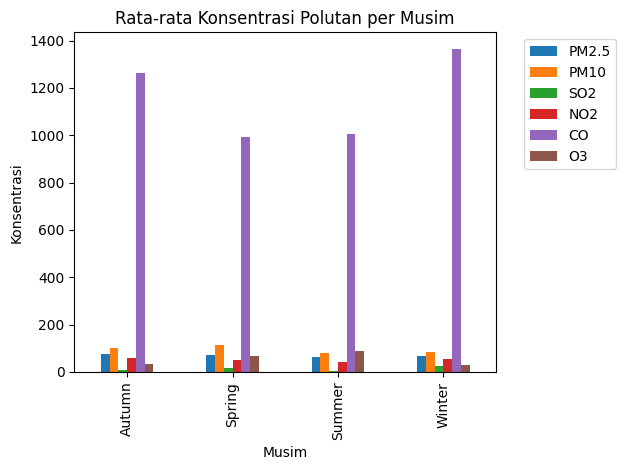

In [64]:
# Visualisasi rata-rata polutan per musim
plt.figure(figsize=(12, 6))
seasonal_means.plot(kind="bar")
plt.title("Rata-rata Konsentrasi Polutan per Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**

Ya, ada perbedaan signifikan dalam pola kualitas udara antar musim dan cluster

1. Variasi Konsentrasi Polutan antar Musim:
    - CO: Menunjukkan variasi yang sangat signifikan antar musim, dengan konsentrasi tertinggi di musim dingin (Winter) dan terendah di musim semi (Spring).
    - PM2.5 dan PM10: Cenderung lebih tinggi di musim dingin (Winter) dan musim gugur (Autumn).
    - SO2 dan NO2: Menunjukkan variasi yang lebih kecil antar musim, namun tetap ada pola yang terlihat.
    - O3: Relatif stabil antar musim, dengan sedikit peningkatan di musim panas (Summer).

2. Distribusi Musim dalam Cluster:
    - Cluster 0: Didominasi oleh musim dingin (Winter, 36.78%) dan musim semi (Spring, 28.96%), dengan proporsi musim panas (Summer) yang paling rendah (7.02%).
    - Cluster 1: Memiliki distribusi yang lebih merata, dengan dominasi musim gugur (Autumn, 33.89%) dan musim panas (Summer, 25.27%). Musim dingin (Winter) memiliki proporsi terendah (16.61%).
    - Cluster 2: Didominasi oleh musim panas (Summer, 34.71%) dan musim semi (Spring, 26.11%), dengan proporsi musim gugur (Autumn) yang paling rendah (19.57%).

3. Implikasi:
    - Cluster 0 mungkin mencerminkan kondisi kualitas udara yang lebih buruk, terutama terkait dengan polutan musim dingin seperti PM2.5 dan CO.
    - Cluster 1 menunjukkan variasi musiman yang lebih seimbang, mungkin mencerminkan daerah dengan fluktuasi kualitas udara yang moderat sepanjang tahun.
    - Cluster 2 kemungkinan mencerminkan kondisi kualitas udara yang lebih baik, dengan dominasi musim panas dan semi yang umumnya memiliki tingkat polusi yang lebih rendah.


### **Analisis Temporal Lanjutan**

### **Pertanyaan 6**: Bagaimana tren kualitas udara dari tahun ke tahun? Apakah ada peningkatan atau penurunan?


Kita juga dapat melakukan analisis temporal yang lebih mendalam untuk memahami pola kualitas udara dari waktu ke waktu.

<Figure size 1200x600 with 0 Axes>

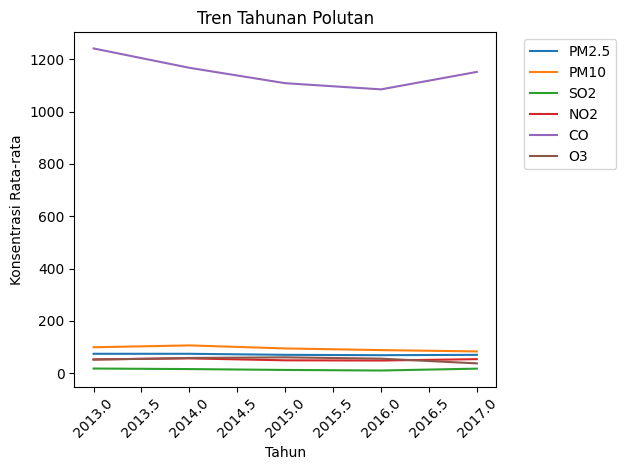

In [65]:
# Tren tahunan
yearly_trend = df.groupby('year')[clustering_features].mean()
plt.figure(figsize=(12, 6))
yearly_trend.plot()
plt.title('Tren Tahunan Polutan')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.ylabel('Konsentrasi Rata-rata')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [66]:
# Hitung perubahan persentase dari tahun pertama ke tahun terakhir
first_year = yearly_trend.index.min()
last_year = yearly_trend.index.max()
percent_change = ((yearly_trend.loc[last_year] - yearly_trend.loc[first_year]) / yearly_trend.loc[first_year]) * 100

print("\nPerubahan persentase konsentrasi polutan dari", first_year, "ke", last_year)
print(percent_change)


Perubahan persentase konsentrasi polutan dari 2013 ke 2017
PM2.5    -5.438260
PM10    -16.141689
SO2      -2.777746
NO2       1.529723
CO       -7.225883
O3      -27.630135
dtype: float64


 **Insight:**

 1. **Penurunan Umum Polutan:**
    - Mayoritas polutan menunjukkan tren penurunan dari tahun 2013 hingga 2017.
    - O3 mengalami penurunan paling signifikan sebesar 27.63%.
    - PM10 juga menunjukkan penurunan yang cukup besar, yaitu 16.14%.

 2. **Perubahan Spesifik per Polutan:**
    - PM2.5: Menurun sebesar 5.44%
    - PM10: Menurun sebesar 16.14%
    - SO2: Sedikit menurun sebesar 2.78%
    - NO2: Satu-satunya polutan yang meningkat, meski hanya sebesar 1.53%
    - CO: Menurun sebesar 7.23%
    - O3: Penurunan terbesar sebesar 27.63%

 3. **Analisis Tren:**
    - Tren penurunan terlihat konsisten untuk sebagian besar polutan dari tahun ke tahun.
    - Penurunan tajam terlihat pada awal periode (2013-2014) untuk beberapa polutan seperti PM10 dan O3.
    - Setelah 2015, beberapa polutan menunjukkan stabilisasi atau sedikit peningkatan.


### **Pertanyaan 7**: Apakah ada pola mingguan dalam kualitas udara? Bagaimana kualitas udara di hari kerja dibandingkan dengan akhir pekan?

<Figure size 1200x600 with 0 Axes>

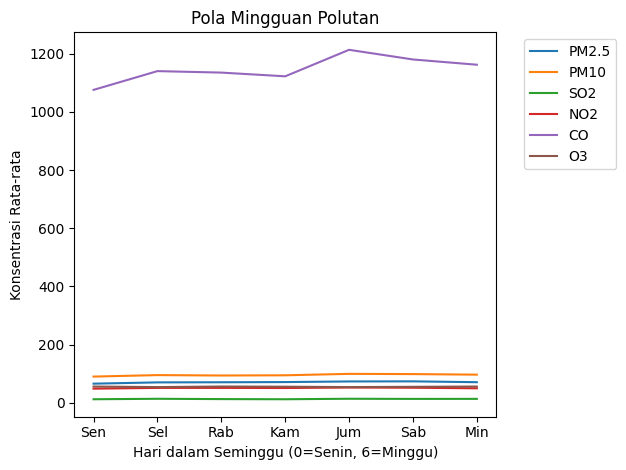

In [67]:
# Pola mingguan
df['day_of_week'] = df['date'].dt.dayofweek
weekly_pattern = df.groupby('day_of_week')[clustering_features].mean()
plt.figure(figsize=(12, 6))
weekly_pattern.plot()
plt.title('Pola Mingguan Polutan')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Konsentrasi Rata-rata')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(7), ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.tight_layout()
plt.show()

In [68]:
# Hitung rata-rata hari kerja vs akhir pekan
weekday_avg = weekly_pattern.iloc[:5].mean()
weekend_avg = weekly_pattern.iloc[5:].mean()

print("\nRata-rata konsentrasi polutan pada hari kerja:")
print(weekday_avg)
print("\nRata-rata konsentrasi polutan pada akhir pekan:")
print(weekend_avg)


Rata-rata konsentrasi polutan pada hari kerja:
PM2.5      70.747960
PM10       95.114778
SO2        13.524423
NO2        51.421830
CO       1136.830979
O3         55.557238
dtype: float64

Rata-rata konsentrasi polutan pada akhir pekan:
PM2.5      72.770761
PM10       98.205943
SO2        14.006092
NO2        51.349650
CO       1170.624914
O3         55.937460
dtype: float64


**Insight:**

 1. **Perbedaan Hari Kerja vs Akhir Pekan:**
    - Secara umum, konsentrasi polutan sedikit lebih tinggi pada akhir pekan dibandingkan hari kerja.
    - PM2.5 meningkat 2.86% pada akhir pekan (72.77 vs 70.75 pada hari kerja).
    - PM10 meningkat 3.25% pada akhir pekan (98.21 vs 95.11 pada hari kerja).
    - CO menunjukkan peningkatan terbesar, yaitu 2.97% pada akhir pekan (1170.62 vs 1136.83 pada hari kerja).

 2. **Pola Harian:**
    - CO menunjukkan fluktuasi paling signifikan sepanjang minggu, dengan puncak pada hari Jumat.
    - PM2.5 dan PM10 menunjukkan pola yang serupa, dengan sedikit peningkatan menjelang akhir pekan.
    - NO2 relatif stabil sepanjang minggu dengan sedikit penurunan pada akhir pekan.
    - O3 menunjukkan variasi minimal antar hari dalam seminggu.

 3. **Konsistensi Polutan:**
    - SO2 dan O3 menunjukkan perbedaan minimal antara hari kerja dan akhir pekan.
    - NO2 sedikit lebih rendah pada akhir pekan, mungkin karena berkurangnya aktivitas industri atau lalu lintas.


### **Analisis Korelasi Lanjutan**

### **Pertanyaan 8**: Bagaimana hubungan antara berbagai polutan? Apakah ada polutan yang sangat berkorelasi satu sama lain?


Kita dapat memperdalam pemahaman tentang hubungan antar variabel dengan analisis korelasi yang lebih rinci.


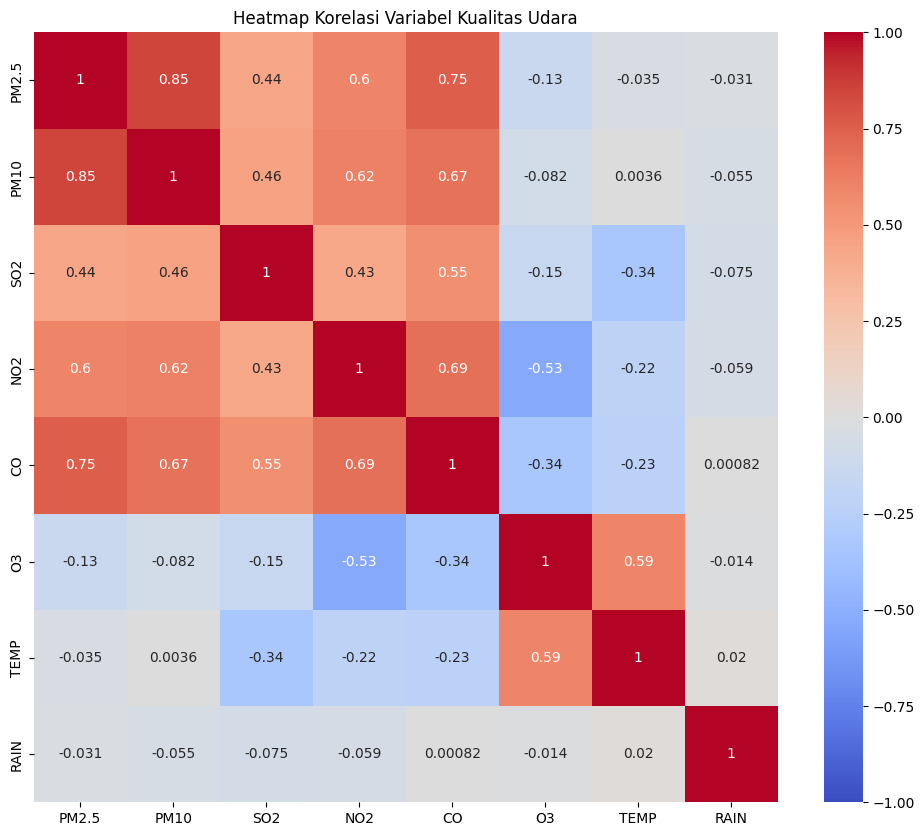

In [69]:
# Heatmap korelasi dengan annotasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[clustering_features + ['TEMP', 'RAIN']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Variabel Kualitas Udara')
plt.show()

In [70]:
# Identifikasi korelasi tertinggi
correlation_matrix = correlation_matrix.abs()
np.fill_diagonal(correlation_matrix.values, 0)
highest_corr = correlation_matrix.unstack().sort_values(ascending=False)[:5]
print("\nPasangan variabel dengan korelasi tertinggi:")
print(highest_corr)


Pasangan variabel dengan korelasi tertinggi:
PM2.5  PM10     0.851308
PM10   PM2.5    0.851308
PM2.5  CO       0.753806
CO     PM2.5    0.753806
       NO2      0.686217
dtype: float64


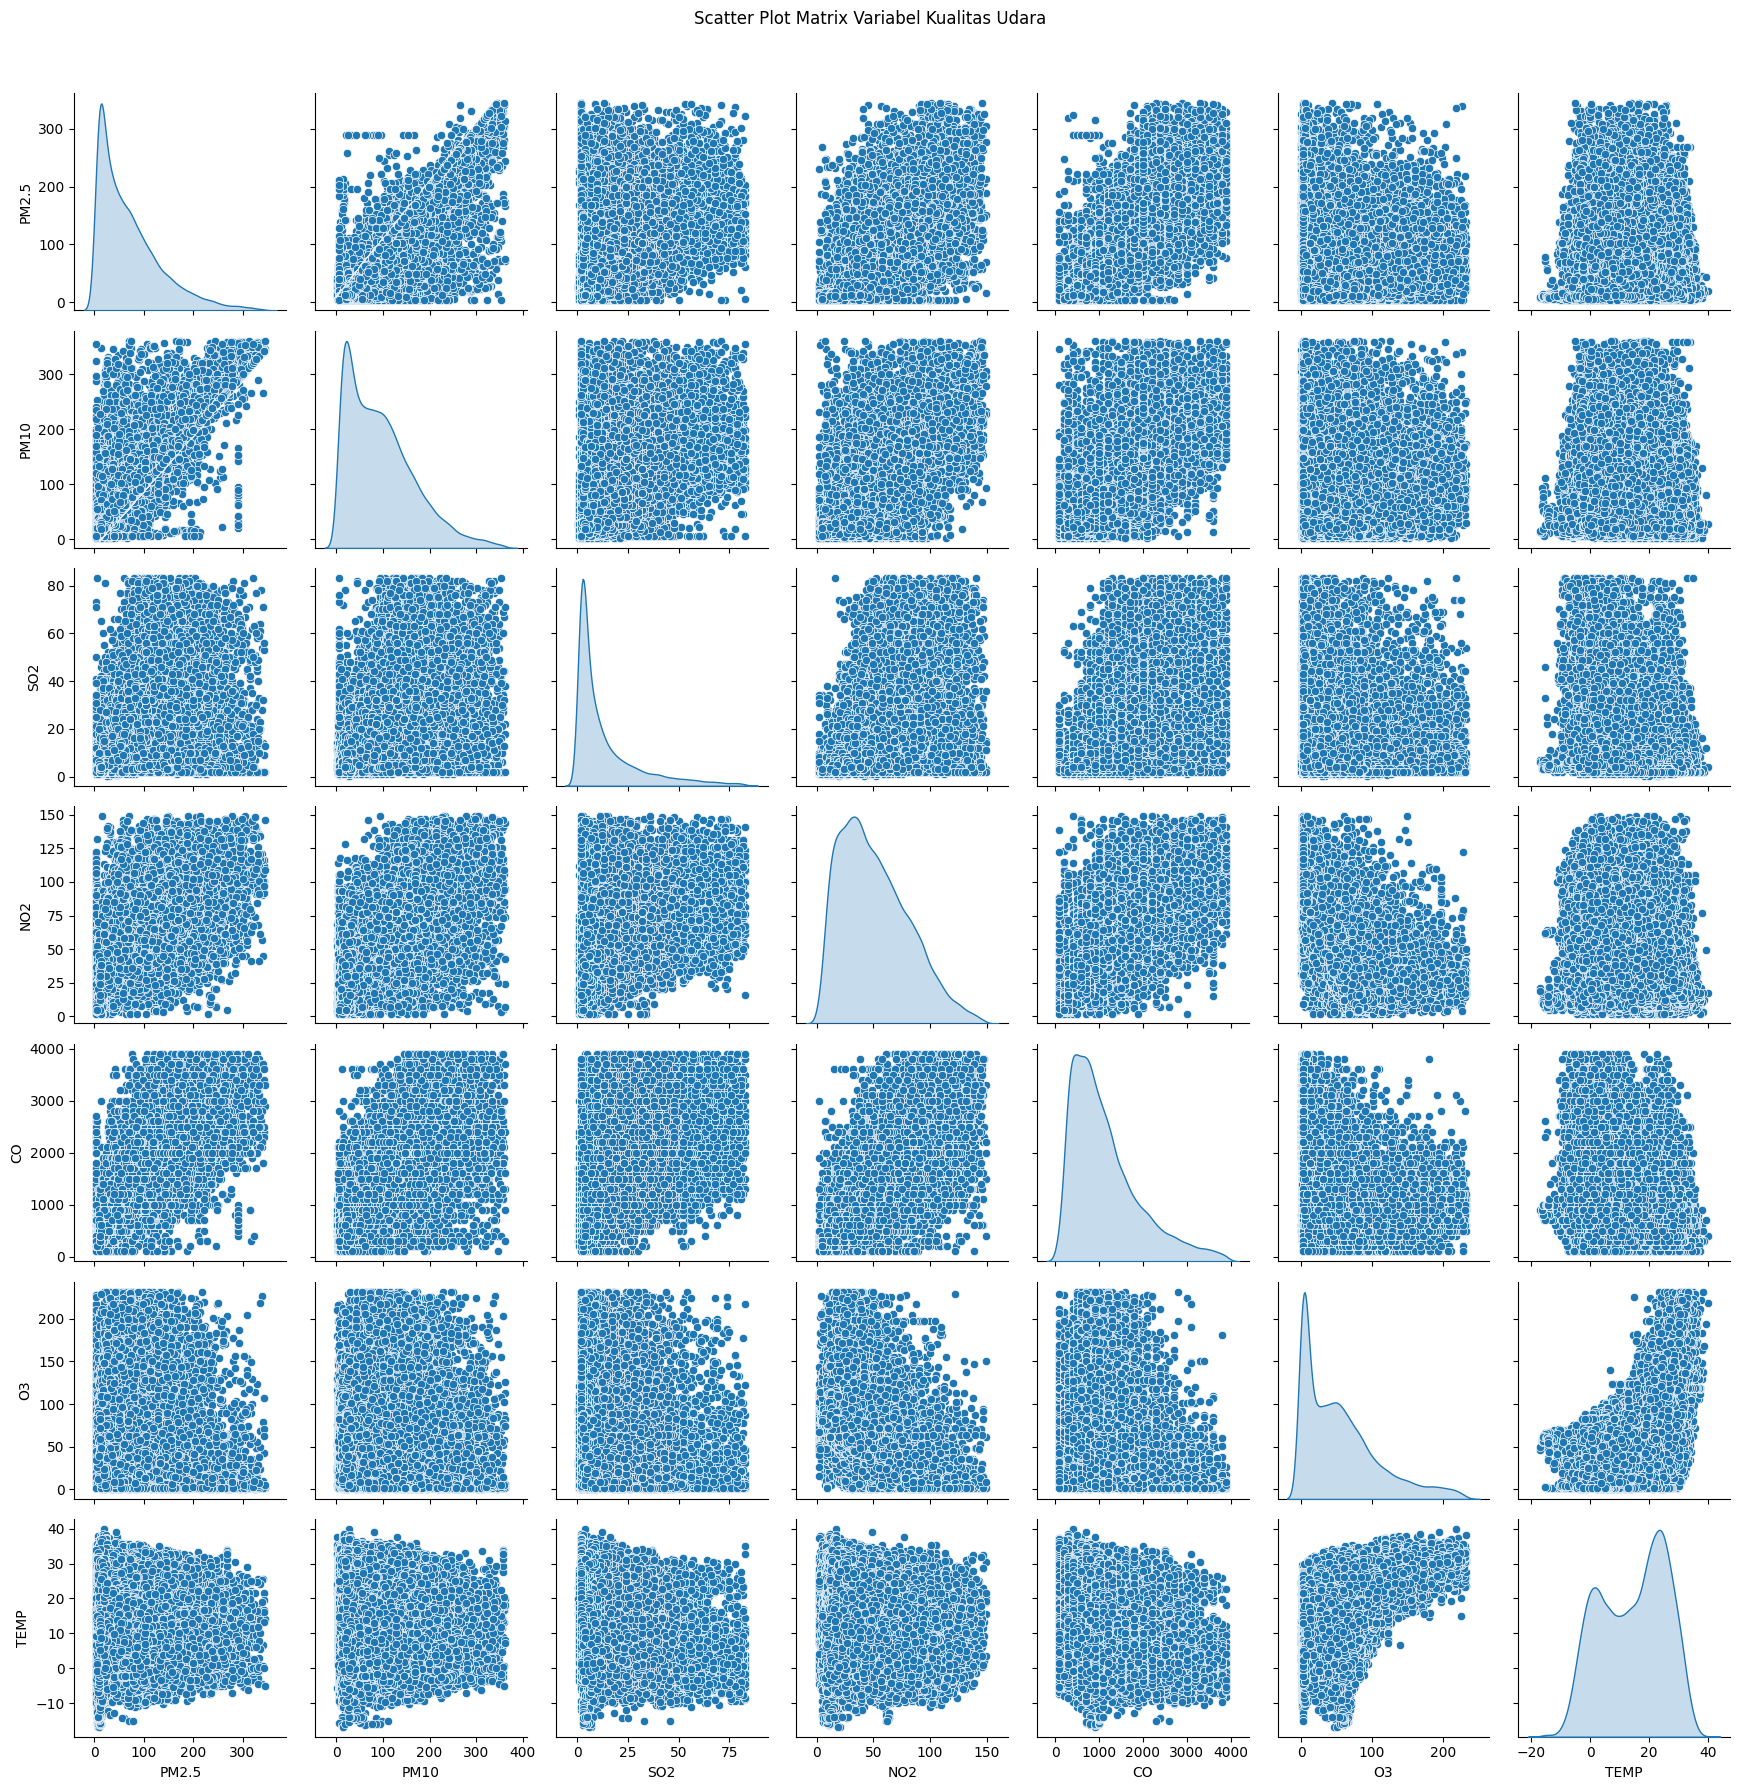

In [71]:
# Scatter plot matrix
sns.pairplot(df[clustering_features + ['TEMP']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix Variabel Kualitas Udara', y=1.02)
plt.tight_layout()
plt.show()

**Insight:**

 1. **Korelasi Kuat antar Polutan:**
    - PM2.5 dan PM10 menunjukkan korelasi positif yang sangat kuat (0.851), mengindikasikan sumber atau perilaku yang serupa.
    - PM2.5 juga berkorelasi kuat dengan CO (0.754), menunjukkan kemungkinan sumber bersama seperti pembakaran.
    - CO dan NO2 memiliki korelasi yang cukup kuat (0.686), mungkin terkait dengan emisi kendaraan bermotor.

 2. **Hubungan Polutan dengan Faktor Meteorologi:**
    - O3 memiliki korelasi positif moderat dengan TEMP (0.59), konsisten dengan pembentukan ozon yang dipengaruhi suhu.
    - NO2 menunjukkan korelasi negatif moderat dengan O3 (-0.53), mungkin mencerminkan siklus fotokimia NO2-O3.
    - Sebagian besar polutan memiliki korelasi negatif lemah dengan TEMP, kecuali O3.
    - RAIN memiliki korelasi yang sangat lemah dengan semua polutan, menunjukkan pengaruh minimal pada konsentrasi polutan.

 3. **Kelompok Polutan:**
    - PM2.5, PM10, CO, dan NO2 membentuk kelompok dengan korelasi positif yang kuat satu sama lain.
    - SO2 menunjukkan korelasi positif moderat dengan kelompok ini tetapi tidak sekuat yang lain.
    - O3 berdiri sendiri dengan korelasi negatif terhadap sebagian besar polutan lain.


Analisis lanjutan ini memberikan pemahaman yang lebih mendalam tentang pola dan karakteristik kualitas udara di Wanshouxigong. Hasil clustering membantu mengidentifikasi tipe-tipe hari berdasarkan profil polutan, sementara analisis temporal dan korelasi lanjutan mengungkapkan pola dan hubungan yang kompleks antara berbagai faktor yang mempengaruhi kualitas udara.

## **Conclusion**

## Pertanyaan 1
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis tren bulanan PM2.5 dan PM10 menunjukkan adanya pola musiman yang kuat dan konsisten. Kedua polutan ini menunjukkan perilaku yang sangat mirip, mengindikasikan sumber atau faktor penyebab yang serupa. Meskipun terdapat variabilitas yang signifikan antar tahun, tidak terlihat adanya tren jangka panjang yang jelas menuju peningkatan atau penurunan kualitas udara.

## Pertanyaan 2
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis pola harian konsentrasi polutan menunjukkan variasi yang signifikan sepanjang hari, dengan pola yang berbeda untuk masing-masing polutan. CO memiliki konsentrasi tertinggi dan menunjukkan pola bimodal yang jelas, kemungkinan besar terkait dengan aktivitas lalu lintas pada jam sibuk pagi dan sore. O3 menunjukkan pola yang berlawanan, mencerminkan sifatnya sebagai polutan sekunder yang terbentuk melalui reaksi fotokimia pada siang hari.

## Pertanyaan 3
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis efek curah hujan terhadap konsentrasi polutan menunjukkan bahwa hujan memiliki dampak pembersihan yang signifikan terhadap kualitas udara, terutama untuk partikulat matter (PM2.5 dan PM10). Efek ini kurang terlihat pada gas-gas polutan seperti SO2, NO2, dan O3, meskipun masih ada sedikit penurunan konsentrasi.

## Pertanyaan 4
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis clustering ini membantu mengidentifikasi tiga pola kualitas udara yang berbeda, dari yang relatif baik hingga sangat buruk. Pola-pola ini dapat digunakan untuk memahami dinamika polusi udara, mengidentifikasi faktor-faktor yang berkontribusi pada episode polusi tinggi, dan mengembangkan strategi mitigasi yang lebih efektif.

## Pertanyaan 5
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Terdapat perbedaan signifikan dalam pola kualitas udara antar musim dan cluster. Setiap cluster memiliki karakteristik musiman yang berbeda, yang mungkin mencerminkan kondisi geografis, meteorologis, atau aktivitas manusia yang berbeda. Pemahaman tentang variasi ini penting untuk merancang strategi pengendalian polusi udara yang efektif dan tepat sasaran untuk setiap cluster dan musim.

## Pertanyaan 6
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tren kualitas udara dari 2013 hingga 2017 menunjukkan perbaikan yang signifikan untuk sebagian besar polutan. Penurunan tajam O3 dan PM10 adalah indikator positif dari efektivitas kebijakan pengendalian polusi udara. Namun, peningkatan kecil NO2 dan stabilisasi beberapa polutan dalam beberapa tahun terakhir menunjukkan perlunya pemantauan dan upaya berkelanjutan. Secara keseluruhan, data menunjukkan kemajuan dalam meningkatkan kualitas udara di wilayah tersebut, tetapi juga menekankan pentingnya mempertahankan dan meningkatkan upaya pengendalian polusi untuk memastikan tren positif ini berlanjut di masa depan.



## Pertanyaan 7
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis pola mingguan kualitas udara menunjukkan perbedaan kecil namun konsisten antara hari kerja dan akhir pekan. Akhir pekan cenderung memiliki tingkat polusi yang sedikit lebih tinggi untuk sebagian besar polutan, terutama PM2.5, PM10, dan CO. Ini mungkin mencerminkan perubahan pola aktivitas manusia, seperti peningkatan perjalanan rekreasi atau kegiatan luar ruangan pada akhir pekan. Namun, perbedaan ini relatif kecil, menunjukkan bahwa sumber polusi utama mungkin konsisten sepanjang minggu. NO2 yang sedikit lebih rendah pada akhir pekan bisa mengindikasikan pengurangan aktivitas industri atau lalu lintas kendaraan bermotor. Temuan ini menekankan pentingnya strategi pengendalian polusi yang mempertimbangkan variasi mingguan dan memfokuskan pada sumber-sumber yang konsisten sepanjang minggu.

## Pertanyaan 8

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analisis korelasi menunjukkan hubungan kompleks antar variabel kualitas udara. Korelasi kuat antara PM2.5, PM10, CO, dan NO2 mengindikasikan sumber polusi bersama, kemungkinan besar terkait dengan aktivitas antropogenik seperti lalu lintas dan industri. O3 menunjukkan pola yang berbeda, menegaskan perannya sebagai polutan sekunder yang dipengaruhi oleh faktor meteorologi, terutama suhu. Hubungan yang lemah antara curah hujan dan polutan menunjukkan bahwa hujan mungkin tidak memiliki efek pembersihan yang signifikan pada kualitas udara di daerah ini.



